In [1]:
%load_ext autoreload
%autoreload 2
#Add own modules to path
import sys
sys.path.append('../..')
sys.path.append('../../src/')

In [60]:
from src.data.create_dataset import create_dataset
X, z = create_dataset('../../data/raw/SRTM_data_Norway_1.tif',downsampling=8)

<Axes3DSubplot:title={'center':'title'}, xlabel='X', ylabel='Y'>

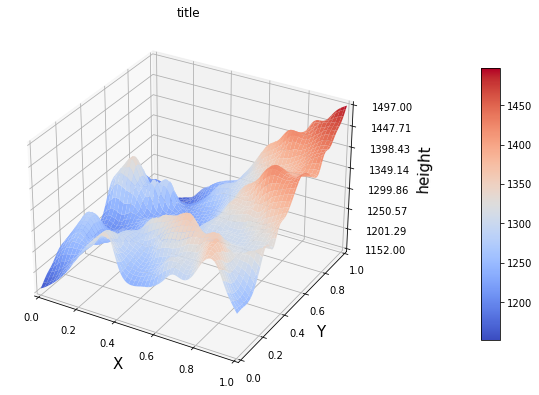

In [43]:
from src.visualization.visualize import plot_surf_from_X
plot_surf_from_X(X,z,'title')

../..\src\visualization\visualize.py:46: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap=cm.coolwarm,


<Axes3DSubplot:title={'center':'title'}, xlabel='X', ylabel='Y'>

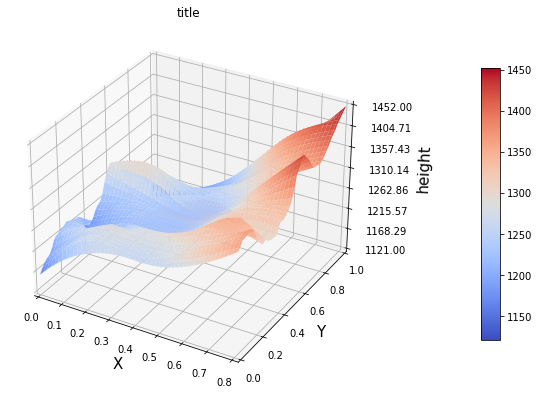

In [4]:
import numpy as np
plot_surf_from_X(X[::40],z[::40],'title')

In [ ]:
from src.modelling.linreg import LinReg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from src.data.create_dataset import create_poly_design_matrix
import numpy as np

#X_mat = create_poly_design_matrix(X[::40].copy(),degree=20)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
X_scl = StandardScaler().fit(X_train)
z_scl = StandardScaler().fit(z_train)

X_train = X_scl.transform(X_train)
X_test = X_scl.transform(X_test)
z_train = z_scl.transform(z_train)
z_test = z_scl.transform(z_test)

ols =LinReg(regularization = None).fit(X_train,z_train)
print(ols.score(X_train,z_train))
print(ols.score(X_test,z_test))
plot_surf_from_X(X_train,z_train,'title')

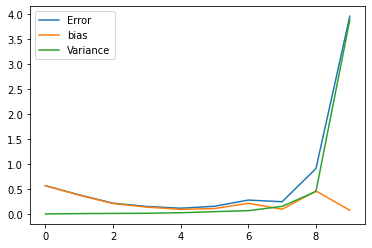

In [65]:
from src.modelling.linreg import LinReg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from src.data.create_dataset import create_poly_design_matrix
from sklearn.utils import resample
import numpy as np
from src.model_evaluation.resampling import bias_var

def bootstrap(X_train, z_train, X_test, n_bootstraps,model):
    z_pred = np.empty((X_test.shape[0], n_bootstraps))
    z_tilde = np.empty((X_train.shape[0], n_bootstraps))   
    
    for i in range(n_bootstraps):
        X_,z_ = resample(X_train, z_train)         #random resampling 
        model.fit(X_,z_)                #fit beta to new resampled data
        z_pred[:,i] = model.predict(X_test).ravel() #predict test data
        z_tilde = model.predict(X_)         #predict train data
    return z_pred

n_bootstraps = 200
max_degree = 10
sigma = 0.3
N = 30
error = np.zeros(max_degree)
#error2 = np.zeros(max_degree+1)
bias = np.zeros(max_degree)
variance = np.zeros(max_degree)
degrees_arr = np.arange(max_degree)

scores_1 = []
scores_2 = []
for i in range(max_degree):
    X_mat = create_poly_design_matrix(X,degree=i)
    X_train, X_test, z_train, z_test = train_test_split(X_mat,z, test_size=0.2,random_state=42)
    X_scl = StandardScaler().fit(X_train)
    z_scl = StandardScaler().fit(z_train)

    X_train = X_scl.transform(X_train)
    X_test = X_scl.transform(X_test)
    z_train = z_scl.transform(z_train)
    z_test = z_scl.transform(z_test)
    
    ols =LinReg(regularization = None)
    
    #z_pred = bootstrap(X_train, z_train, X_test, 50,ols)
       
    z_test = z_test.reshape(-1,1)
    error[i], bias[i], variance[i] = bias_var(ols, X_train, X_test, z_train,z_test)
    #Calculating MSE bias and variance
    #error[i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
    #bias[i] = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
    #variance[i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

    
    
    #scores_1.append(ols.score(X_train,z_train))
    #scores_2.append(ols.score(X_test,z_test))
    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(degrees_arr,error, label='Error')
plt.plot(degrees_arr,bias, label='bias')
plt.plot(degrees_arr,variance, label='Variance')
plt.legend()

In [50]:
X_orig = create_poly_design_matrix(X,degree=20)

X_original = X_scl.transform(X_orig)
z_orig = z_scl.transform(z)

ValueError: X has 231 features, but StandardScaler is expecting 55 features as input.

In [ ]:
print(ols.score(X_test,z_test))
#print(ols.score(X_mat,z[::4]))

In [ ]:
plot_surf_from_X(X_original,z_orig,'title')

In [ ]:
plot_surf_from_X(X_original,ols.predict(X_original),'title')